In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

In [2]:
print("Using torch", torch.__version__)

Using torch 2.3.1+cu121


### Тензоры

In [373]:
zeros_array = np.zeros(5)
zeros_np = torch.from_numpy(zeros_array)

In [374]:
zeros_tensor = torch.zeros(5)

In [375]:
print(f"From numpy Tensor: \n {zeros_np} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

From numpy Tensor: 
 tensor([0., 0., 0., 0., 0.], dtype=torch.float64) 

Zeros Tensor: 
 tensor([0., 0., 0., 0., 0.])


In [376]:
print(f"From numpy Tensor: \n {zeros_np.float()} \n")  # float переводит в float32
print(f"Zeros Tensor: \n {zeros_tensor}")

From numpy Tensor: 
 tensor([0., 0., 0., 0., 0.]) 

Zeros Tensor: 
 tensor([0., 0., 0., 0., 0.])


In [377]:
print(f"Shape of tensor: {zeros_tensor.shape}")
print(f"Datatype of tensor: {zeros_tensor.dtype}")
print(f"Device tensor is stored on: {zeros_tensor.device}")
print(f"Tensor gradient: {zeros_tensor.grad}")

Shape of tensor: torch.Size([5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Tensor gradient: None


In [378]:
ones_tensor = torch.ones(5, requires_grad=True)

In [379]:
print(f"Ones Tensor: \n {ones_tensor}")
print(f"Shape of tensor: {ones_tensor.shape}")
print(f"Datatype of tensor: {ones_tensor.dtype}")
print(f"Device tensor is stored on: {ones_tensor.device}")
print(f"Is tensor gradient required: {ones_tensor.requires_grad}")
print(f"Tensor gradient: {ones_tensor.grad}")

Ones Tensor: 
 tensor([1., 1., 1., 1., 1.], requires_grad=True)
Shape of tensor: torch.Size([5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Is tensor gradient required: True
Tensor gradient: None


In [388]:
loss = torch.mean((ones_tensor - zeros_tensor) ** 2)
# same as
# loss = ((ones_tensor - zeros_tensor) ** 2).mean()

In [389]:
# dL/d_ones = 2

# dmean/d_ones = 1 / n

In [390]:
loss

tensor(1., grad_fn=<MeanBackward0>)

In [391]:
ones_tensor.grad

tensor([0., 0., 0., 0., 0.])

In [394]:
zeros_tensor.grad is None

True

In [393]:
loss.backward()

In [386]:
# обнулить градиенты
ones_tensor.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [395]:
# если не обнулять градиенты
for i in range(5):
    loss = ((ones_tensor - zeros_tensor) ** 2).mean()
    loss.backward()
    print(ones_tensor.grad)

tensor([0.8000, 0.8000, 0.8000, 0.8000, 0.8000])
tensor([1.2000, 1.2000, 1.2000, 1.2000, 1.2000])
tensor([1.6000, 1.6000, 1.6000, 1.6000, 1.6000])
tensor([2., 2., 2., 2., 2.])
tensor([2.4000, 2.4000, 2.4000, 2.4000, 2.4000])


### Обучение нейронной сети.

Процесс обучения:

1. Прямой проход: Вычислияем результат модели на обучающем датасете.
2. Вычисление потерь: Сравниваем прогнозы с реальными значениями и вычислияем функцию потерь.
3. Обратное распространение: Вычислияем градиенты по параметрам модели и обновияем веса сети.
4. Повторяем для каждой эпохи.

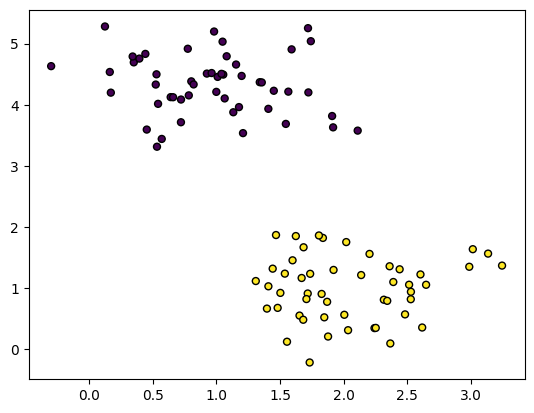

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=25, edgecolors='k', c=y)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # 'mps' for Mac

In [5]:
inputs = torch.Tensor(X).float()
targets = torch.Tensor(y).float().view((-1, 1))

In [6]:
# Определение простой нейронной сети
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)  # 2
        self.sigmoid = nn.Sigmoid()  # sigmoid(w * x + b)

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [7]:
# Создание модели, функции потерь и оптимизатора
model = SimpleNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Weghts = Weghts - lr * weghts.grad

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[0.4228, 0.4165]], requires_grad=True),
 Parameter containing:
 tensor([0.1916], requires_grad=True)]

In [9]:
model = model.to(device)
inputs = inputs.to(device)

In [10]:
# Обучение модели
n_epochs = 100

# Переводим модель в режим тренировки
# переключение между режимами train и eval меняет поведение некоторых слоев
model.train()

for epoch in range(1, n_epochs+1):
    # Прямой проход
    outputs = model(inputs)

    # Вычисление потерь
    loss = criterion(outputs, targets)

    # Обратное распространение и оптимизация
    optimizer.zero_grad()

    # делаем обратный проход по графу и считаем градиенты
    loss.backward()

    # делаем шаг оптимизатора
    optimizer.step()

    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 1, Loss: 1.351722240447998
Epoch 2, Loss: 0.9952588081359863
Epoch 3, Loss: 0.7357118129730225
Epoch 4, Loss: 0.5764625668525696
Epoch 5, Loss: 0.4873620867729187
Epoch 6, Loss: 0.43580037355422974
Epoch 7, Loss: 0.4027388095855713
Epoch 8, Loss: 0.37910187244415283
Epoch 9, Loss: 0.36064663529396057
Epoch 10, Loss: 0.3453008234500885
Epoch 11, Loss: 0.33198973536491394
Epoch 12, Loss: 0.3201197385787964
Epoch 13, Loss: 0.3093419671058655
Epoch 14, Loss: 0.2994377911090851
Epoch 15, Loss: 0.2902618944644928
Epoch 16, Loss: 0.28171148896217346
Epoch 17, Loss: 0.2737099826335907
Epoch 18, Loss: 0.2661978602409363
Epoch 19, Loss: 0.2591266930103302
Epoch 20, Loss: 0.25245603919029236
Epoch 21, Loss: 0.2461513876914978
Epoch 22, Loss: 0.24018272757530212
Epoch 23, Loss: 0.23452362418174744
Epoch 24, Loss: 0.22915054857730865
Epoch 25, Loss: 0.22404241561889648
Epoch 26, Loss: 0.21918019652366638
Epoch 27, Loss: 0.21454675495624542
Epoch 28, Loss: 0.2101263850927353
Epoch 29, Loss: 0.

Вопрос:
Почему при новом запуске значения функции потерь на первых эпохах разные?

###Оценка нейронной сети.

После обучения модели необходимо проверить её производительность на тестовых данных.

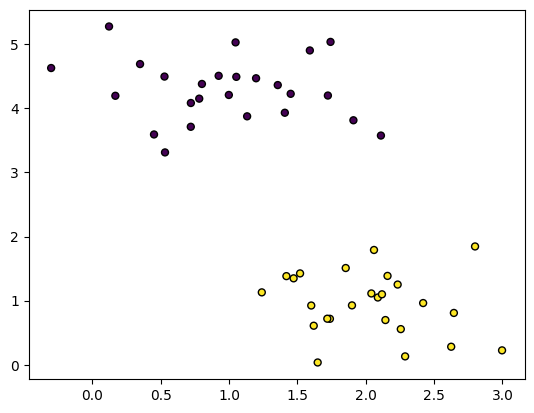

In [11]:
X_test, y_test = make_blobs(n_samples=50, centers=2, n_features=2, cluster_std=0.5, random_state=0)

plt.scatter(X_test[:, 0], X_test[:, 1], s=25, edgecolors='k', c=y_test)

In [12]:
# Предположим, что у нас есть тестовые данные:
test_inputs = torch.Tensor(X_test).float()
test_targets = torch.Tensor(y_test).float().view((-1, 1))

# Переводим модель в режим оценки
# Не хранит в графе промежуточные значения
model.eval()

# Прямой проход на тестовых данных
with torch.no_grad():   # Отключаем вычисление градиентов
    test_outputs = model(test_inputs)

# Вычисление потерь на тестовых данных
test_loss = criterion(test_outputs, test_targets)

print(f"Test Loss: {test_loss.item()}")

# Если бы это была задача классификации, мы бы также вычислили точность и другие метрики.


Test Loss: 0.09351760894060135


In [13]:
model.fc.weight, model.fc.bias

(Parameter containing:
 tensor([[ 1.5195, -1.2192]], requires_grad=True),
 Parameter containing:
 tensor([0.5149], requires_grad=True))

In [14]:
# используем вес модели для визуализации разделяющей прямой
W, b = model.fc.weight.detach().numpy(), model.fc.bias.detach().numpy()  # если тензор нужен для расчет градиента, то мы используем команду detach()

x = np.linspace(0, 3.0, 100)
y = - W[:, 0] / W[:, 1] * x + b

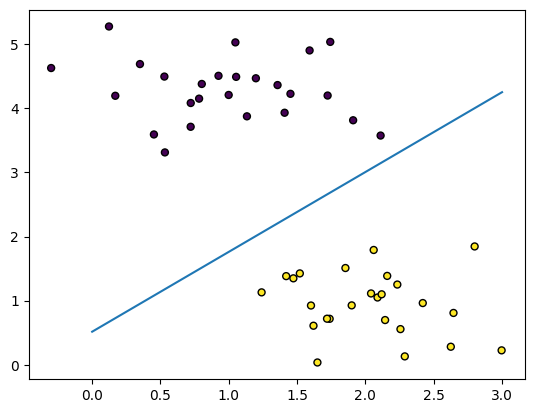

In [15]:
X_test, y_test = make_blobs(n_samples=50, centers=2, n_features=2, cluster_std=0.5, random_state=0)

plt.scatter(X_test[:, 0], X_test[:, 1], s=25, edgecolors='k', c=y_test)
plt.plot(x, y)

### Нелинейная задача

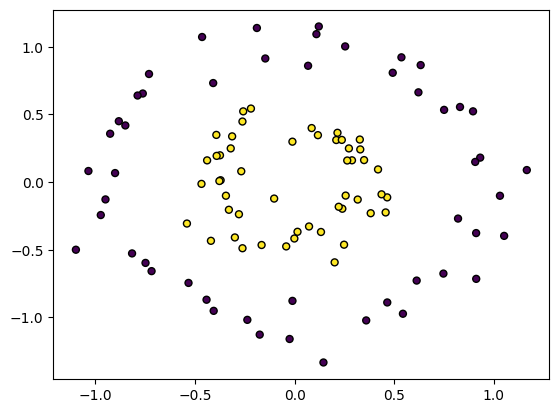

In [439]:
X, y = make_circles(n_samples=100, noise=.1, random_state=0, factor=.4)

plt.scatter(X[:, 0], X[:, 1], s=25, edgecolors='k', c=y)

In [440]:
inputs = torch.Tensor(X).float()
targets = torch.Tensor(y).float().view((-1, 1))

In [441]:
# Определение простой нейронной сети
class DoubleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [443]:
# Создание модели, функции потерь и оптимизатора
model = DoubleNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=2.)

In [444]:
model = model.to(device)
inputs = inputs.to(device)

In [445]:
# Обучение модели
n_epochs = 1000

# Переводим модель в режим тренировки
# переключение между режимами train и eval меняет поведение некоторых слоев
model.train()

for epoch in range(1, n_epochs+1):
    # Прямой проход

    outputs = model(inputs)

    # Вычисление потерь
    loss = criterion(outputs, targets)

    # Обратное распространение и оптимизация
    optimizer.zero_grad()

    # делаем обратный проход по графу и считаем градиенты
    loss.backward()

    # делаем шаг оптимизатора
    optimizer.step()

    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 1, Loss: 0.6988498568534851
Epoch 2, Loss: 0.6935697793960571
Epoch 3, Loss: 0.6934828758239746
Epoch 4, Loss: 0.693468451499939
Epoch 5, Loss: 0.6934552788734436
Epoch 6, Loss: 0.6934424042701721
Epoch 7, Loss: 0.6934296488761902
Epoch 8, Loss: 0.6934170722961426
Epoch 9, Loss: 0.6934047937393188
Epoch 10, Loss: 0.6933925747871399
Epoch 11, Loss: 0.6933805346488953
Epoch 12, Loss: 0.693368673324585
Epoch 13, Loss: 0.6933569312095642
Epoch 14, Loss: 0.6933454275131226
Epoch 15, Loss: 0.6933340430259705
Epoch 16, Loss: 0.6933227777481079
Epoch 17, Loss: 0.6933116316795349
Epoch 18, Loss: 0.6933005452156067
Epoch 19, Loss: 0.6932896971702576
Epoch 20, Loss: 0.693278968334198
Epoch 21, Loss: 0.6932681798934937
Epoch 22, Loss: 0.693257749080658
Epoch 23, Loss: 0.6932471990585327
Epoch 24, Loss: 0.6932369470596313
Epoch 25, Loss: 0.6932265758514404
Epoch 26, Loss: 0.6932163834571838
Epoch 27, Loss: 0.693206250667572
Epoch 28, Loss: 0.6931962370872498
Epoch 29, Loss: 0.6931861639022827

### Нелинейная задача. Валидация

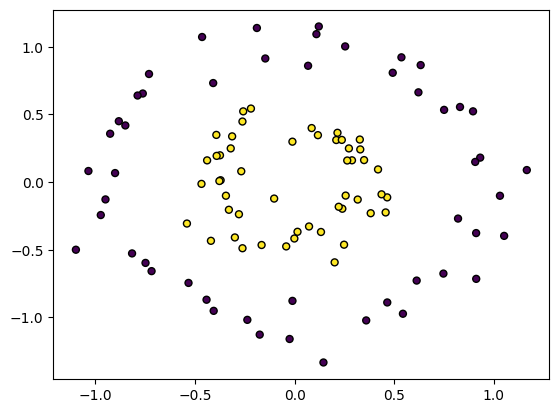

In [446]:
X_test, y_test = make_circles(n_samples=100, noise=.1, random_state=0, factor=.4)

plt.scatter(X_test[:, 0], X_test[:, 1], s=25, edgecolors='k', c=y_test)

In [447]:
# Сгенерируем тестовые данные из этого же распределения:
test_inputs = torch.Tensor(X_test).float()
test_targets = torch.Tensor(y_test).float().view((-1, 1))

# Переводим модель в режим оценки
# Не хранит в графе промежуточные значения
model.eval()

# Прямой проход на тестовых данных
with torch.no_grad():   # Отключаем вычисление градиентов
    test_outputs = model(test_inputs)

# Вычисление потерь на тестовых данных
test_loss = criterion(test_outputs, test_targets)

print(f"Test Loss: {test_loss.item()}")

# Если бы это была задача классификации, мы бы также вычислили точность и другие метрики.

Test Loss: 0.062004927545785904


In [448]:
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))

Z = model(torch.from_numpy(np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])).float())
Z = Z.reshape(xx.shape)

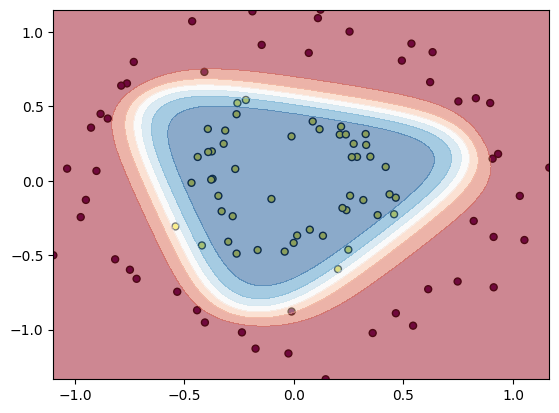

In [449]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=25, edgecolors='k', c=y_test)
plt.contourf(xx, yy, Z.detach().numpy(), cmap='RdBu', alpha=.5)

In [450]:
model.fc1.weight

Parameter containing:
tensor([[-1.9285, -8.3238],
        [-6.1681,  5.4480],
        [-6.8419, -2.1390]], requires_grad=True)

In [451]:
model.fc1.bias

Parameter containing:
tensor([ 4.1644,  4.1985, -4.1029], requires_grad=True)

In [452]:
model.fc2.weight

Parameter containing:
tensor([[  9.0281,   8.8537, -10.2645]], requires_grad=True)